In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [2]:
transport = pd.read_csv('events_month.csv')
transport.rename(columns={'vehicle_location_longitude':'long','vehicle_location_latitude':'lat'}, inplace=True)
trips = pd.read_csv('trips_month.csv')
transport = pd.merge(transport, trips,  how='left', left_on=['tripID','vehicle_id'], right_on = ['tripID','vehicle_id'])

In [3]:
# Trip does not indicate unique completion of single route
transport.loc[transport.tripID ==7105620].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 428409 to 429176
Data columns (total 16 columns):
bearing            768 non-null int64
delay              768 non-null int64
timestamp          768 non-null object
lastLocID          768 non-null int64
lastStopSeq        768 non-null int64
nextLocID          768 non-null int64
nextStopSeq        768 non-null int64
signMessageLong    768 non-null object
tripID             768 non-null int64
vehicle_id         768 non-null int64
long               768 non-null float64
lat                768 non-null float64
blockID            768 non-null int64
direction          768 non-null int64
garage             768 non-null object
routeNumber        768 non-null int64
dtypes: float64(2), int64(11), object(3)
memory usage: 102.0+ KB


In [4]:
tripID = transport.loc[transport.tripID ==7105620].sort_values('timestamp')
tripID

,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,long,lat,blockID,direction,garage,routeNumber
428952,114,-592,2017-01-17 18:45:59,9831,9,9830,10,MAX Blue Line to Gresham,7105620,317,-122.865347,45.515611,9001,0,RUBY,100
428876,114,-592,2017-01-17 18:45:59,9831,9,9830,10,MAX Blue Line to Gresham,7105620,303,-122.865347,45.515611,9001,0,RUBY,100
428951,124,-582,2017-01-17 18:47:45,9830,10,9828,11,MAX Blue Line to Gresham,7105620,317,-122.850968,45.509695,9001,0,RUBY,100
428875,124,-582,2017-01-17 18:47:45,9830,10,9828,11,MAX Blue Line to Gresham,7105620,303,-122.850968,45.509695,9001,0,RUBY,100
428950,128,-539,2017-01-17 18:49:07,9828,11,9822,12,MAX Blue Line to Gresham,7105620,317,-122.839130,45.503524,9001,0,RUBY,100
428874,128,-539,2017-01-17 18:49:07,9828,11,9822,12,MAX Blue Line to Gresham,7105620,303,-122.839130,45.503524,9001,0,RUBY,100
428871,126,-519,2017-01-17 18:50:30,9822,12,9826,13,MAX Blue Line to Gresham,7105620,303,-122.831143,45.499387,9001,0,RUBY,100
428947,126,-519,2017-01-17 18:50:30,9822,12,9826,13,MAX Blue Line to Gresham,7105620,317,-122.831143,45.499387,9001,0,RUBY,100
428873,120,-523,2017-01-17 18:52:59,9826,13,9824,14,MAX Blue Line to Gresham,7105620,303,-122.815889,45.492985,9001,0,RUBY,100
428949,120,-523,2017-01-17 18:52:59,9826,13,9824,14,MAX Blue Line to Gresham,7105620,317,-122.815889,45.492985,9001,0,RUBY,100


In [94]:
tripID.delay.min()

-1000

In [65]:
tripID.groupby('lastLocID').mean().sample(2)

,bearing,delay,lastStopSeq,nextLocID,nextStopSeq,tripID,vehicle_id,long,lat,blockID,direction,routeNumber
lastLocID,,,,,,,,,,,,
9843,90.000000,49.875000,3.0,9841.0,4.0,7105620.0,245.875,-122.976168,45.521253,9001.0,0.0,100.0
9759,19.333333,22.444444,19.0,9758.0,20.0,7105620.0,253.000,-122.690691,45.521105,9001.0,0.0,100.0


In [6]:
print(len(transport.signMessageLong.unique()))
transport.signMessageLong.unique()

21


array(['MAX  Red Line to Airport',
       'MAX  Red Line to City Center & Beaverton',
       'MAX  Blue Line to Gresham',
       'MAX  Blue Line to Ruby Junction/E 197th Ave',
       'MAX  Blue Line to Elmonica/170th', 'MAX  Blue Line to Hillsboro',
       'MAX  Blue Line to Willow Creek/SW 185th Ave',
       'MAX  Yellow Line to Expo Center',
       'MAX  Yellow Line to City Center/Milwaukie',
       'MAX  Yellow Line to Interstate/Rose Quarter',
       'MAX  Green Line to Clackamas Town Center',
       'MAX  Green Line to Gateway TC',
       'MAX  Green Line to City Center/PSU',
       'MAX  Orange Line to City Center/Expo Center',
       'MAX  Orange Line to City Center/PSU',
       'MAX  Orange Line to Milwaukie', 'MAX  Blue Line to Gateway TC',
       'MAX  Blue Line to City Center', 'MAX  Blue Line to Rose Qtr',
       'MAX  To City Center', 'MAX  Yellow Line to City Center/PSU'],
      dtype=object)

In [7]:
transport['bigtripID'] = (transport.tripID.apply(str) + transport.vehicle_id.apply(str)).apply(int)
transport.head()

,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,long,lat,blockID,direction,garage,routeNumber,bigtripID
0,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,416,-122.563200,45.560901,9043,0,ELMO,90,6997146416
1,270,-107,2017-01-01 00:07:26,10574,24,10576,25,MAX Red Line to Airport,6997146,416,-122.561480,45.572588,9043,0,ELMO,90,6997146416
2,299,-138,2017-01-01 00:10:39,10576,25,10579,26,MAX Red Line to Airport,6997146,416,-122.571721,45.580453,9043,0,ELMO,90,6997146416
3,1,-136,2017-01-01 00:04:51,11616,22,10572,23,MAX Red Line to Airport,6997146,416,-122.567106,45.556137,9043,0,ELMO,90,6997146416
4,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,417,-122.563200,45.560901,9043,0,ELMO,90,6997146417


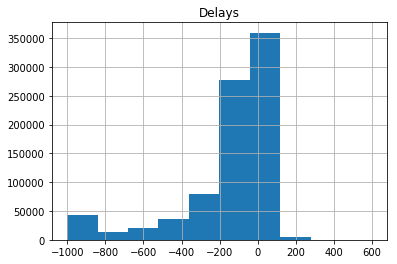

In [8]:
transport['delay'].hist()
plt.title('Delays')
plt.show()

In [9]:
vehicle = transport.groupby(['vehicle_id']).mean().add_suffix('_avg').reset_index()

In [10]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
vehicle_id         140 non-null int64
bearing_avg        140 non-null float64
delay_avg          140 non-null float64
lastLocID_avg      140 non-null float64
lastStopSeq_avg    140 non-null float64
nextLocID_avg      140 non-null float64
nextStopSeq_avg    140 non-null float64
tripID_avg         140 non-null float64
long_avg           140 non-null float64
lat_avg            140 non-null float64
blockID_avg        140 non-null float64
direction_avg      140 non-null float64
routeNumber_avg    140 non-null float64
bigtripID_avg      140 non-null float64
dtypes: float64(13), int64(1)
memory usage: 15.4 KB


In [11]:
station = (transport.groupby(['nextLocID','signMessageLong','direction']).mean().reset_index())[['nextLocID','signMessageLong','direction','delay','long','lat']]

# converting delay to positive
station.delay = station.delay*(-1)

In [12]:
vehicle = (transport.groupby(['nextLocID','signMessageLong','direction']).mean().reset_index())[['nextLocID','signMessageLong','direction','delay','long','lat']]

# converting delay to positive
station.delay = station.delay*(-1)

In [45]:
trip = transport[['nextLocID','bigtripID','signMessageLong','direction','delay',]]

In [72]:
delayDF = trip.set_index('bigtripID')['delay']
delayDF = pd.DataFrame(data = delayDF).reset_index()
delayDF = ((delayDF.groupby('bigtripID',as_index=True))['delay']).apply(list).apply(pd.Series)
delayDF = delayDF[delayDF.duplicated()]
delayDF['stop_len'] = (delayDF.notnull()).sum(axis=1)
delayDF['total_delay'] = (delayDF).sum(axis=1)
delayDF.head(10)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,stop_len,total_delay
bigtripID,,,,,,,,,,,,,,,,,,,,,
6997146417,-138.0,-107.0,-138.0,-136.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,-515.0
6997147313,58.0,68.0,76.0,64.0,25.0,-32.0,-15.0,-27.0,-34.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,192.0
6997148242,0.0,-34.0,10.0,14.0,-7.0,16.0,17.0,27.0,25.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,99.0
6997149326,13.0,-33.0,-16.0,1.0,-5.0,-20.0,-4.0,-12.0,-10.0,-31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,-534.0
6997150238,18.0,-25.0,-7.0,-3.0,-2.0,-23.0,-3.0,20.0,33.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,118.0
6997152327,-31.0,-72.0,-54.0,-50.0,-56.0,-92.0,-76.0,-39.0,-18.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,-708.0
6997153408,38.0,-11.0,7.0,44.0,25.0,-10.0,9.0,35.0,50.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,-565.0
6997154421,37.0,-13.0,5.0,9.0,-9.0,-29.0,-9.0,24.0,43.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,-118.0
6997155225,38.0,3.0,30.0,71.0,79.0,-1.0,-13.0,10.0,32.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,476.0


In [93]:
delayDF[8].min()

-1000.0

In [88]:
avgDelays = delayDF.groupby('stop_len').mean()
del avgDelays['total_delay']
avgDelays.head(15)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
stop_len,,,,,,,,,,,,,,,,,,,,,
1,-202.032468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-604.215909,-624.147727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-269.772727,-256.396970,-283.475758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-197.416290,-199.945701,-210.990950,-247.576923,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-171.313665,-166.335404,-184.897516,-157.018634,-161.242236,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-435.096774,-425.983871,-432.274194,-436.427419,-421.387097,-430.887097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-258.959488,-258.151386,-246.275053,-239.040512,-227.311301,-218.023454,-252.579957,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-177.921320,-178.845178,-169.478426,-160.081218,-148.002538,-154.883249,-164.142132,-182.555838,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-168.557414,-172.307692,-188.237458,-185.594203,-160.517280,-156.636566,-149.171683,-156.876254,-182.459309,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


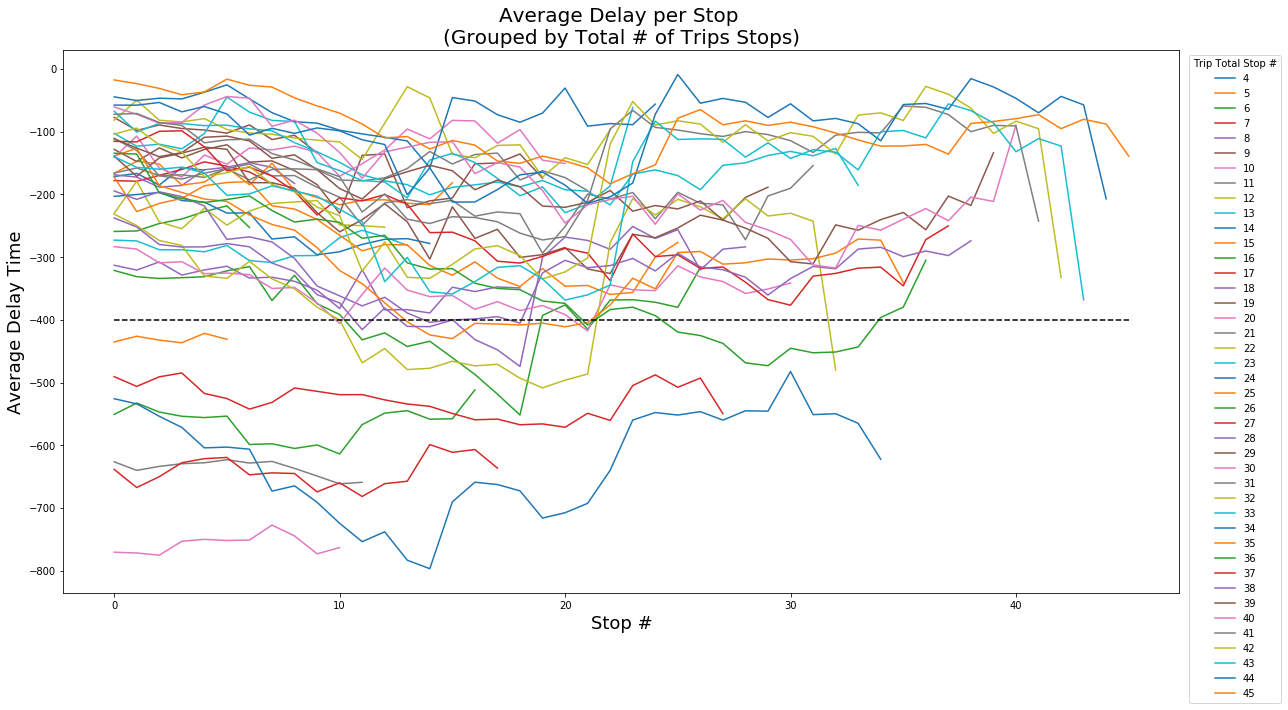

In [209]:
stoprange = (list(avgDelays.index[3:45]))
y = [-400,-400]
x = [0] + [stoprange[-1]]

# txt="Notes: ... "

plt.figure(figsize=(20,10))

for i in stoprange:
    plt.plot(avgDelays.iloc[i])
plt.plot(x,y, '--', color ='black')
plt.legend(stoprange, title= 'Trip Total Stop #',loc='upper center', bbox_to_anchor=(1.05,1),prop={'size': 10})
plt.title('Average Delay per Stop \n(Grouped by Total # of Trips Stops)',fontsize=20)
plt.xlabel('Stop #',fontsize=18)
plt.ylabel('Average Delay Time',fontsize=18)
# plt.text(0, -1000, txt,fontsize=18)
plt.show()

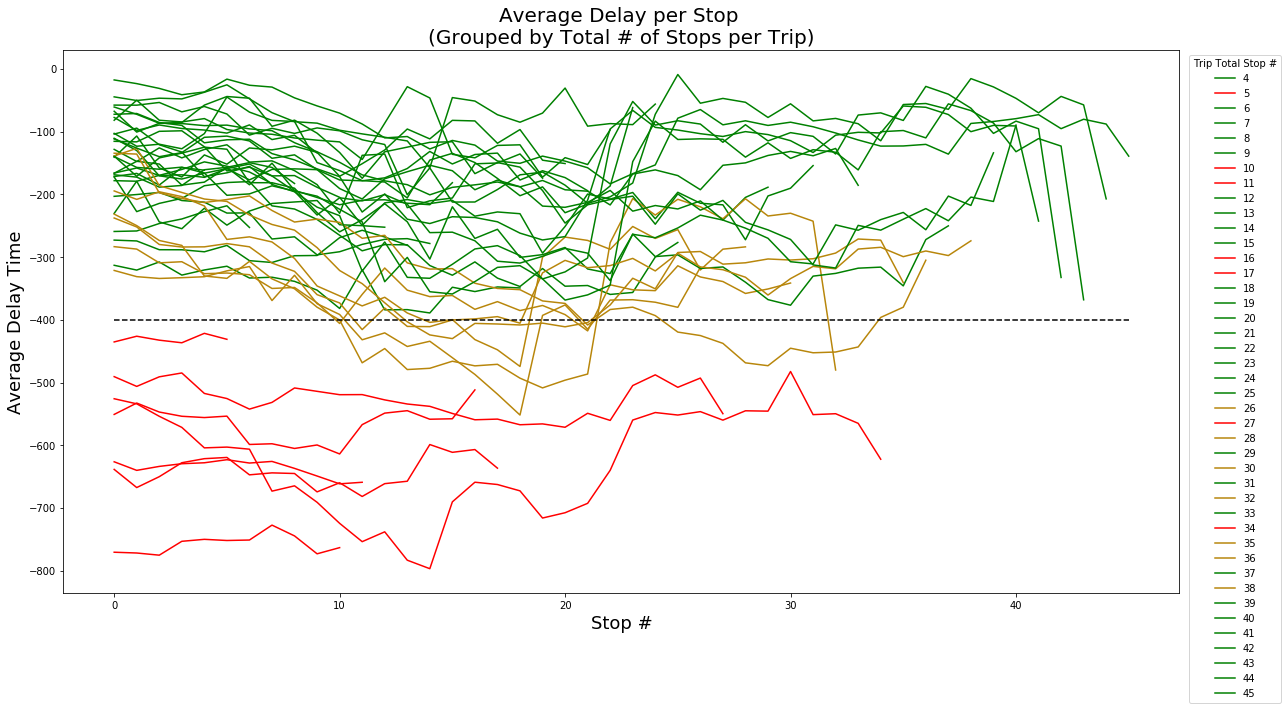

In [225]:
stoprange = (list(avgDelays.index[3:45]))
y = [-400,-400]
x = [0] + [stoprange[-1]]

# txt="Notes: ... "

plt.figure(figsize=(20,10))

for i in stoprange:
    if avgDelays.iloc[i].dropna().mean() < -400:
        plt.plot(avgDelays.iloc[i],color='red')
    elif avgDelays.iloc[i].dropna().min() < -400:
        plt.plot(avgDelays.iloc[i],color='darkgoldenrod')
    else:
        plt.plot(avgDelays.iloc[i],color='green')
    
    
plt.plot(x,y, '--', color ='black')
plt.legend(stoprange, title= 'Trip Total Stop #',loc='upper center', bbox_to_anchor=(1.05,1),prop={'size': 10})
plt.title('Average Delay per Stop \n(Grouped by Total # of Stops per Trip)',fontsize=20)
plt.xlabel('Stop #',fontsize=18)
plt.ylabel('Average Delay Time',fontsize=18)
# plt.text(0, -1000, txt,fontsize=18)
plt.show()